In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install opencv-python
!pip install cmake
!pip install dlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## ÏÇ¨ÏßÑÏ§ÄÎπÑ

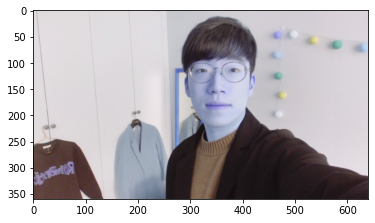

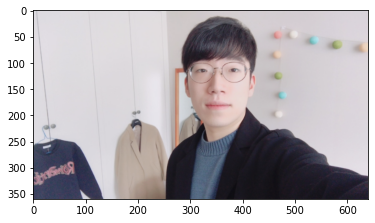

In [4]:
import os
my_image_path = '/content/drive/MyDrive/Github/AIFFEL/Exploration_3/camera_sticker/images/test.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## ÏñºÍµ¥ Í≤ÄÏ∂ú face detection

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)#dlibÏùÄ rgb Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê cvtColor() Î•º Ïù¥Ïö©Ìï¥ÏÑú opencv Ïùò bgr Ïù¥ÎØ∏ÏßÄÎ•º rgbÎ°ú Î≥ÄÌôòÌï¥ Ï£ºÏóàÏäµÎãàÎã§.
dlib_rects = detector_hog(img_rgb, 1)   #(image, num of img pyramid)Ïù¥ÎØ∏ÏßÄÎ•º upsampling Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∞Îäî Í≤É
print("üå´üõ∏")

üå´üõ∏


dlibÏùÄ rgb Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê cvtColor() Î•º Ïù¥Ïö©Ìï¥ÏÑú opencv Ïùò bgr Ïù¥ÎØ∏ÏßÄÎ•º rgbÎ°ú Î≥ÄÌôòÌï¥ Ï£ºÏóàÏäµÎãàÎã§.

rectangles[[(270, 64) (425, 219)]]


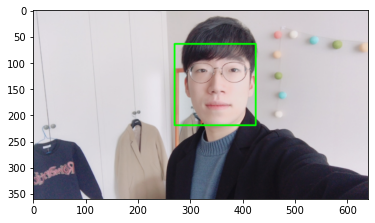

In [6]:
#Ï∞æÏùÄ ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark


Ïù¥Î™©Íµ¨ÎπÑÏùò ÏúÑÏπòÎ•º Ï∂îÎ°†ÌïòÎäî Í≤ÉÏùÑ face landmark localization Í∏∞Ïà†

face landmarkÎäî detection Ïùò Í≤∞Í≥ºÎ¨ºÏù∏ bounding box Î°ú ÏûòÎùºÎÇ∏(crop) ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù¥Ïö©Ìï©ÎãàÎã§.

Object keypoint estimation ÏïåÍ≥†Î¶¨Ï¶ò

Face landmarkÏôÄ Í∞ôÏù¥ Í∞ùÏ≤¥ ÎÇ¥Î∂ÄÏùò Ï†êÏùÑ Ï∞æÎäî Í∏∞Ïà†ÏùÑ object keypoint estimationÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§. keypointÎ•º Ï∞æÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌÅ¨Í≤å 2Í∞ÄÏßÄÎ°ú ÎÇòÎàÑÏñ¥ ÏßëÎãàÎã§.

1) top-down : bounding boxÎ•º Ï∞æÍ≥† box ÎÇ¥Î∂ÄÏùò keypointÎ•º ÏòàÏ∏°

2) bottom-up : Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤¥Ïùò keypointÎ•º Î®ºÏ†Ä Ï∞æÍ≥† point Í¥ÄÍ≥ÑÎ•º Ïù¥Ïö©Ìï¥ Íµ∞ÏßëÌôî Ìï¥ÏÑú box ÏÉùÏÑ±

In [7]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 ./drive/MyDrive/Github/AIFFEL/Exploration_3/camera_sticker/models
# !cd ~/content/drive/MyDrive/Github/AIFFEL/Exploration_3/camera_sticker/ && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [8]:
import os
model_path = '/content/drive/MyDrive/Github/AIFFEL/Exploration_3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


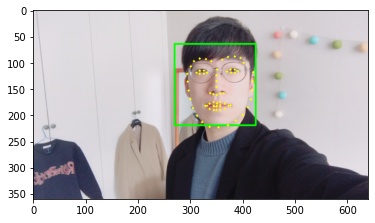

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 146)
(x,y) : (350,68)
(w,h) : (156,156)


ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎäî ÏΩîÏùò Ï§ëÏã¨Ï†êÏù¥ (350, 146)

In [12]:
import os
sticker_path = '/content/drive/MyDrive/Github/AIFFEL/Exploration_3/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [32]:
refined_x = x - w //2   # left
refined_y = y - h //2 +200  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,190)


In [33]:
#opencv Îç∞Ïù¥ÌÑ∞Îäî numpy ndarray ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
#ndarrayÎäî ÏùåÏàò Ïù∏Îç±Ïä§Ïóê Ï†ëÍ∑ºÌï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê ÏùåÏàòÏóê ÎåÄÌïú ÏòàÏô∏ Ï≤òÎ¶¨Î•º Ìï¥Ï§òÏïº Ìï©ÎãàÎã§. 
#Îî∞ÎùºÏÑú Í∑∏Î¶ºÏóêÏÑú Î≥¥ÏãúÎäî Í≤ÉÏ≤òÎüº ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞Ìï¥ Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.
#-y ÌÅ¨Í∏∞ÎßåÌÅº Ïä§Ìã∞Ïª§Î•º crop Ìï©ÎãàÎã§.
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,0)


In [34]:
# #Ïù¥ÎØ∏ÏßÄ Ïß§Î¶¨ÎäîÍ∞í ÌóàÏö©
# sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
# # sticker_area = img_show
# # img_show = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

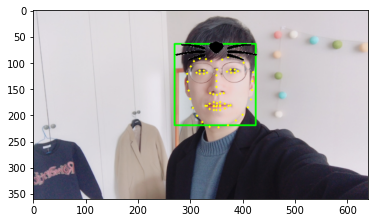

In [35]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

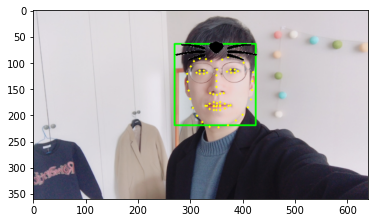

In [36]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

In [37]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

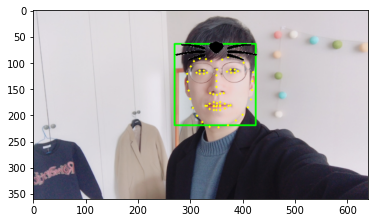

In [38]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()